In [1]:
import urllib.request
import json
import pymongo
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import time
import requests
from nltk.corpus import stopwords

In [2]:
url = r'https://www.reddit.com/r/london/comments/71q10h/uber_loses_london_operating_licence_after_ruling/.json?limit=500'

In [3]:
comments = []
replies =[]
with urllib.request.urlopen(url) as uber:
    content = uber.read()
contentd = json.loads(content)
for index, i in enumerate(contentd[1]['data']['children']):
    try:
        comments.append(i['data']['body'])
        
        if i['data']['replies'] !="":
            comments.append(i['data']['replies']['data']['children'][0]['data']['body'])
    except:
        print(index)
        pass
    

20
39
45
56
58


In [4]:
clean = []
for i in comments:
    clean.append(i.lower().strip().replace('\n','').replace('-','').replace('https:','').replace('&','and').replace('"','') \
           .replace('?','').replace('!','').replace(',','').replace('.','').replace(':','').replace(';','').replace(')','') \
           .replace('(','').replace('[','').replace(']','').replace('/',' ').replace('"it\'s"','it\'s'))

In [5]:
clean

["london is uber's only profitable city in europe this is a big deal for them",
 'how what on earth are their overheads',
 "ok so afaik this doesn't mean they're gonna be gone by midnight or some shitthey have 21 days to appeal  during which time they can continue to operate  and i *think* that after that they can keep operating until the entire appeal has been resolved  which could be *ages*and to be honest  they'll presumably win the appeal while giving up some major concessions reregulation this seems more like tfl demonstrating it means business especially in the wake of the dodgy sexual assault stuff",
 'yup uber has been described by the mayor of calgary as being the worst people he has had to negotiate with the company pulls a fine line between legal and informal economy they will be allowed to opperate however i imagine the city uses this as a bargaining chip with the proper cab industry too',
 'i hope at the very least uber can demonstrate new policies for dealing with the dem

In [6]:
stop = stopwords.words('english')

In [7]:
stop.append('http')

In [8]:
stop.append('it\'s')

In [9]:
stop.append('don\'t')

In [10]:
stop.append('i\'ve')

In [11]:
stop.append('i\'m')

In [12]:
stop.append('i\'d')

In [13]:
stop.append('they\'re')

In [14]:
stop.append('i\'d')

In [15]:
stop.append('what\'s')

In [16]:
stop.append('andgt')

In [17]:
stop.append('aren\'t')

In [18]:
stop.append('weren\'t')

In [19]:
stop.append('i\'ll')

In [20]:
stop.append('they\'ve')
stop.append('way')
stop.append('well')

In [21]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [22]:
wordcount = {}

for line in clean: #for each line
    words = line.split() #split into words ~~#space and tabs is default so nothing between brackets()
    for word in words: # for each word in list words
        
        if word not in stop:
            
            wordcount[word] = wordcount.get(word, 0)+1 #add to dictionary, default of 0 add 1 when you find one

In [23]:
wc = sorted(wordcount.items(), key=lambda x: x[1], reverse=True)

In [24]:
import matplotlib.pyplot as plt
plt.figure()
import plotly.plotly as py
from plotly.graph_objs import *
from wordcloud import WordCloud
import numpy as np
from PIL import Image
from os import path


In [62]:
d = path.dirname("C:\\data")

In [63]:
wordcount.items()

dict_items([('london', 10), ("uber's", 6), ('profitable', 1), ('city', 4), ('europe', 1), ('big', 3), ('deal', 1), ('earth', 2), ('overheads', 1), ('ok', 1), ('afaik', 1), ("doesn't", 3), ('mean', 2), ('gonna', 1), ('gone', 3), ('midnight', 1), ('shitthey', 1), ('21', 4), ('days', 5), ('appeal', 8), ('time', 8), ('continue', 2), ('operate', 4), ('*think*', 1), ('keep', 2), ('operating', 2), ('entire', 2), ('resolved', 1), ('could', 3), ('*ages*and', 1), ('honest', 2), ("they'll", 2), ('presumably', 3), ('win', 1), ('giving', 1), ('major', 1), ('concessions', 1), ('reregulation', 1), ('seems', 2), ('like', 12), ('tfl', 13), ('demonstrating', 2), ('means', 2), ('business', 4), ('especially', 2), ('wake', 1), ('dodgy', 2), ('sexual', 1), ('assault', 1), ('stuff', 2), ('yup', 1), ('uber', 47), ('described', 1), ('mayor', 2), ('calgary', 1), ('worst', 2), ('people', 10), ('negotiate', 1), ('company', 5), ('pulls', 1), ('fine', 1), ('line', 1), ('legal', 2), ('informal', 1), ('economy', 1), 

In [64]:
taxi_mask = np.array(Image.open(path.join(d, r"taxi.png")))

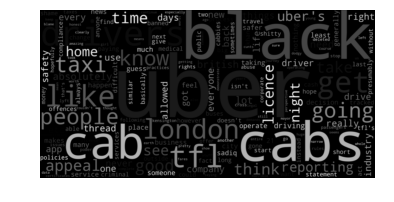

In [71]:
wordcloud = WordCloud(height= 2000, width=4000,background_color='black', colormap='gray').generate_from_frequencies(wordcount)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()

plt.show()


In [26]:
url2 = r'https://www.reddit.com/r/london/comments/724zik/uber_is_reportedly_ready_to_make_concessions_to/.json?limit=500'
comments2 = []
with urllib.request.urlopen(url2) as uber:
    content = uber.read()
contentd = json.loads(content)
for index, i in enumerate(contentd[1]['data']['children']):
    try:
        comments.append(i['data']['body'])
        
        if i['data']['replies'] !="":
            comments2.append(i['data']['replies']['data']['children'][0]['data']['body'])
    except:
        print(index)
        pass

In [27]:
clean2 = []
for i in comments2:
    clean2.append(i.lower().strip().replace('\n','').replace('-','').replace('https:','').replace('&','and').replace('"','') \
           .replace('?','').replace('!','').replace(',','').replace('.','').replace(':','').replace(';','').replace(')','') \
           .replace('(','').replace('[','').replace(']','').replace('/',' ').replace('"it\'s"','it\'s').replace('moneyi\'ll','money i\'ll'))

In [28]:
wordcount2 = {}

for line in clean2: #for each line
    words = line.split() #split into words ~~#space and tabs is default so nothing between brackets()
    for word in words: # for each word in list words
        
        if word not in stop:
            
            wordcount2[word] = wordcount2.get(word, 0)+1 #add to dictionary, default of 0 add 1 when you find one

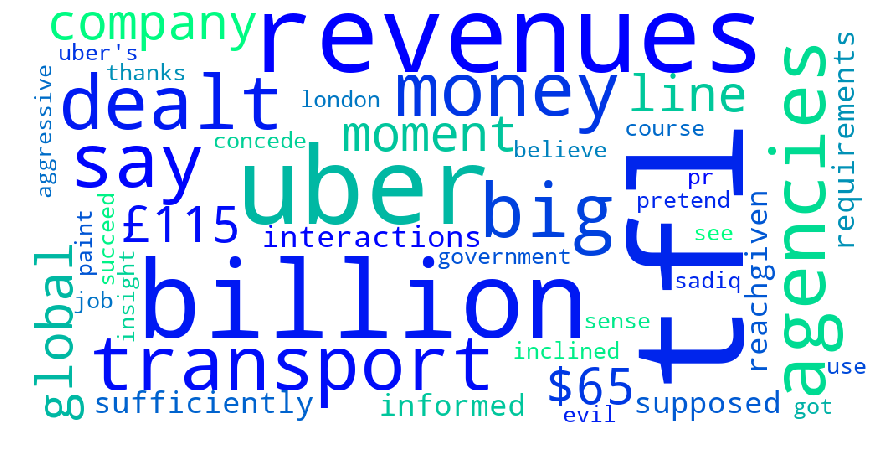

In [29]:
wordcloud2 = WordCloud(width = 1000, height = 500, background_color='white', colormap='winter').generate_from_frequencies(wordcount2)
plt.figure(figsize=(15,8))
word = plt.imshow(wordcloud2)
plt.axis("off")
plt.show(word)